# Homework 3: Be There or Be Squared

### Run the code below to get the main functions loaded then you can run the questions below it. 


In [74]:
import math
import itertools
from collections import defaultdict
# finding all of the squars https://stackoverflow.com/questions/15984849/python-fastest-way-to-find-all-perfect-squares-in-a-given-large-number-range
def squares(n):
    list_squares = []
    largest = int(math.sqrt(n))
    for i in range(1,largest+1):
        val = i * i
        list_squares.append(val)
    return list_squares
# Getting the decompositions (I am returning the squared values not the unsquared ones) 
def decompositions(n, flag=False):
    square_numbers = squares(n)
    square_numbers.sort()
    decomposition_lists = []
    for size in range(1, n+1):
        for combination in itertools.combinations_with_replacement(square_numbers, size):
            if sum(combination) == n:
                decomposition_lists.append(list(combination))
        
        # Stop when we find the first valid combinations
        if decomposition_lists:
            break
    return decomposition_lists

## Question 1
Generate a single shortest length decomposition for n

In [75]:
n = 100000 # change this value to change n
full_list = decompositions(n) # change this value to change n
print(f"A smallest decomp list for {n}: {full_list[0]}")

A smallest decomp list for 100000: [144, 99856]


# Question 2
Generate the list of all shortest length decompositions for n

In [76]:
n = 100000 # change this value to change n
full_list = decompositions(n) 
print(f"Smallest decomp lists for {n}: {full_list}") 

Smallest decomp lists for 100000: [[144, 99856], [10000, 90000], [32400, 67600]]


# Question 3
Graphing all numbers up to 10,000. the block below will take 10 mins to run (im sorry). But hopefully the plots save so you wont have to worry about that. 

In [79]:
n = 10000
graph_data = defaultdict(int)
for number in range(1, n):
    value = len(decompositions(number))
    graph_data[value] += 1



List of how many numbers of each decomp length there are defaultdict(<class 'int'>, {1: 1899, 2: 1036, 3: 387, 4: 501, 5: 302, 6: 528, 7: 262, 8: 487, 9: 269, 10: 444, 12: 375, 11: 208, 13: 162, 14: 276, 16: 237, 15: 173, 18: 179, 24: 94, 17: 77, 21: 79, 19: 56, 25: 40, 22: 82, 26: 43, 20: 132, 23: 44, 33: 16, 27: 44, 28: 33, 31: 8, 29: 13, 35: 20, 36: 19, 40: 4, 30: 47, 38: 7, 44: 4, 32: 20, 41: 7, 37: 4, 52: 5, 43: 8, 53: 7, 39: 15, 34: 12, 50: 5, 46: 6, 48: 13, 42: 13, 51: 11, 54: 20, 45: 11, 49: 5, 47: 6, 75: 11, 58: 2, 61: 9, 57: 10, 62: 5, 72: 11, 55: 3, 69: 11, 63: 11, 56: 4, 79: 7, 60: 9, 59: 2, 73: 5, 84: 5, 65: 4, 66: 7, 70: 6, 85: 7, 67: 6, 87: 7, 81: 14, 98: 3, 64: 4, 68: 5, 100: 4, 83: 5, 76: 4, 90: 15, 74: 1, 80: 6, 101: 4, 89: 4, 78: 6, 105: 19, 96: 5, 86: 3, 91: 6, 77: 8, 94: 4, 109: 9, 92: 7, 71: 4, 102: 5, 82: 1, 99: 14, 106: 7, 95: 5, 88: 2, 118: 1, 93: 9, 121: 4, 128: 5, 113: 4, 134: 2, 115: 5, 142: 8, 110: 10, 97: 3, 117: 8, 119: 6, 111: 6, 123: 9, 126: 12, 114: 12

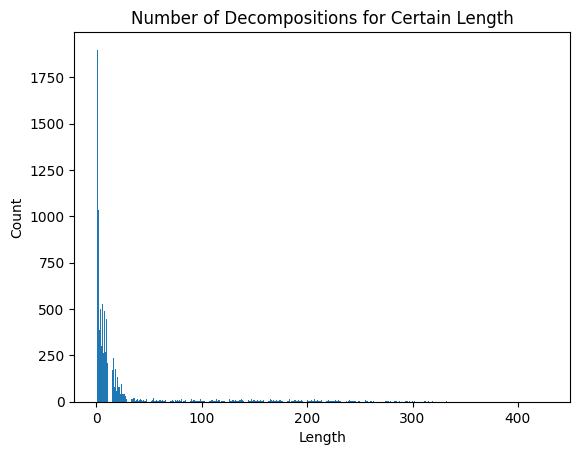

In [110]:
import matplotlib.pyplot as plt
    
print(f"List of how many numbers of each decomp length there are {graph_data}")
print(graph_data[32])
length = list(graph_data.keys())
count = list(graph_data.values())

plt.bar(length, count)

plt.xlabel('Length')
plt.ylabel('Count')

plt.title('Number of Decompositions for Certain Length')

plt.show()

# Question 4
We can see that most numbers can be made with fewer squares summed. 

# Question 5
For n less than or equal to 500 graphed for size of decomposition and number of numbers with that length. 

List of how many numbers of each decomp length there are defaultdict(<class 'int'>, {1: 203, 2: 109, 3: 56, 4: 38, 5: 22, 6: 18, 7: 7, 8: 5, 9: 9, 10: 6, 12: 7, 11: 3, 13: 4, 14: 1, 16: 4, 15: 5, 18: 1, 24: 1})


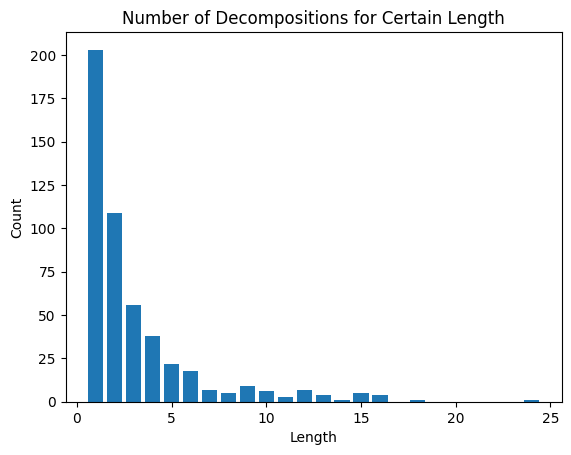

In [112]:
n = 500
graph_data = defaultdict(int)
for number in range(1, n):
    value = len(decompositions(number))
    graph_data[value] += 1

print(f"List of how many numbers of each decomp length there are {graph_data}")
length = list(graph_data.keys())
count = list(graph_data.values())

plt.bar(length, count)

plt.xlabel('Length')
plt.ylabel('Count')

plt.title('Number of Decompositions for Certain Length')

plt.show()

# Question 6

Wall-clock running time for n <= 1000

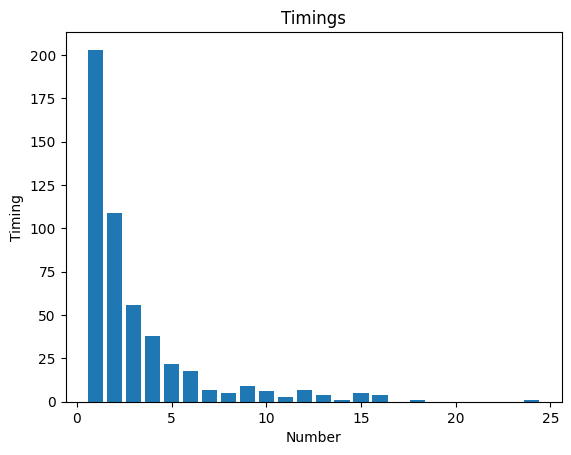

In [118]:
import timeit

timings = defaultdict(int)
for i in range(1, 1001):
    time = timeit.timeit("decompositions(i)", globals=globals(), number=10)
    timings[i] = time
    
Number = list(timings.keys())
Timing = list(timings.values())

plt.bar(length, count)

plt.xlabel('Number')
plt.ylabel('Timing')

plt.title('Timings')

plt.show()
